# COL14

In [2]:
import pandas as pd

In [3]:
col14 = pd.read_csv("/usr1/home/s124mdg53_07/wang/FYP/rawdata/col14_behave/merged_dataset.csv")
col14.head()
col14.columns


Index(['Transaction.Date', 'Transaction.Amount', 'Customer.Age',
       'Is.Fraudulent', 'Account.Age.Days', 'Transaction.Hour', 'source',
       'browser', 'sex', 'Payment.Method', 'Product.Category', 'Quantity',
       'Device.Used', 'Address.Match'],
      dtype='object')

In [4]:
# 2. 重命名列
df = col14.rename(columns={
    'Transaction.Date': 'timestamp',
    'Transaction.Amount': 'amount',
    'Customer.Age': 'user_age',
    'Is.Fraudulent': 'is_fraud',
    'Account.Age.Days': 'account_age_days',
    'Transaction.Hour': 'hour_of_day',
    'source': 'channel',
    'browser': 'browser',
    'sex': 'user_gender',
    'Payment.Method': 'payment_method',
    'Product.Category': 'product_category',
    'Quantity': 'quantity',
    'Device.Used': 'device_type',
    'Address.Match': 'address_match'
})

# 3. 处理数据类型
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['amount'] = df['amount'].astype(float)
df['is_fraud'] = df['is_fraud'].astype(int)
df['address_match'] = df['address_match'].map({'Yes': True, 'No': False}).fillna(df['address_match'])

# 4. 衍生时间特征
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour_of_day'] = df['timestamp'].dt.hour

# 5. 缺失值处理（示例）
df['user_age'] = df['user_age'].fillna(df['user_age'].median())
df['account_age_days'] = df['account_age_days'].fillna(df['account_age_days'].median())

# 6. 确认标准化结果
print(df.dtypes)
print(df.head(3))


timestamp           datetime64[ns]
amount                     float64
user_age                     int64
is_fraud                     int64
account_age_days             int64
hour_of_day                float64
channel                     object
browser                     object
user_gender                 object
payment_method              object
product_category            object
quantity                     int64
device_type                 object
address_match                int64
day_of_week                float64
dtype: object
            timestamp  amount  user_age  is_fraud  account_age_days  \
0 2024-02-12 10:05:21  145.98        29         0               172   
1 2024-01-25 22:24:06  677.62        40         0               250   
2 2024-03-26 20:32:44  798.63        40         0               118   

   hour_of_day channel  browser user_gender payment_method product_category  \
0         10.0     Ads       IE           F    credit card    home & garden   
1         22.0  Di

/tmp/ipykernel_1893437/1512408051.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['address_match'] = df['address_match'].map({'Yes': True, 'No': False}).fillna(df['address_match'])


Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 297000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         296997 non-null  datetime64[ns]
 1   amount            297000 non-null  float64       
 2   user_age          297000 non-null  int64         
 3   is_fraud          297000 non-null  int64         
 4   account_age_days  297000 non-null  int64         
 5   hour_of_day       297000 non-null  float64       
 6   channel           297000 non-null  object        
 7   browser           297000 non-null  object        
 8   user_gender       297000 non-null  object        
 9   payment_method    297000 non-null  object        
 10  product_category  297000 non-null  object        
 11  quantity          297000 non-null  int64         
 12  device_type       297000 non-null  object        
 13  address_match     297000 non-null  int64         
 1

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,296997,NaN,NaN,NaN,2019-09-30 20:57:55.856018944,2015-01-01 00:00:44,2015-06-17 08:38:31,2015-11-22 03:16:55,2024-02-16 02:10:55,2024-04-03 08:13:36,NaN
amount,297000.0,NaN,NaN,NaN,118.881066,9.0,30.0,52.89,146.48,903.35,150.412404
user_age,297000.0,NaN,NaN,NaN,33.827135,-10.0,27.0,33.0,40.0,86.0,9.377694
is_fraud,297000.0,NaN,NaN,NaN,0.068182,0.0,0.0,0.0,0.0,1.0,0.252058
account_age_days,297000.0,NaN,NaN,NaN,117.484684,0.0,40.0,87.0,177.0,365.0,100.430783
hour_of_day,297000.0,NaN,NaN,NaN,11.511118,0.0,6.0,12.0,17.0,23.0,6.921182
channel,297000,3,SEO,119127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
browser,297000,5,Chrome,120338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_gender,297000,2,M,160998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,297000,4,credit card,74520,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
timestamp      3
day_of_week    3
dtype: int64

Number of duplicate rows: 0


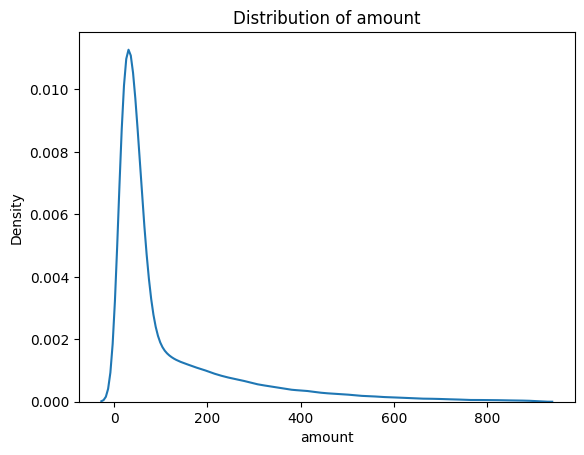

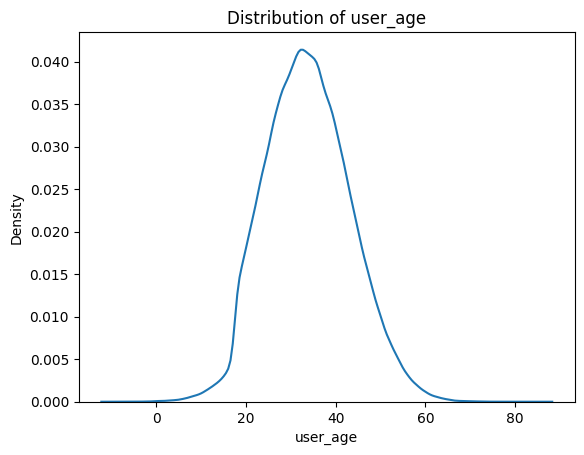

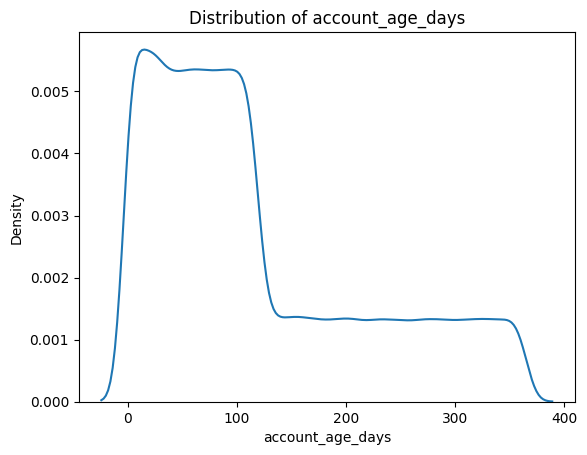

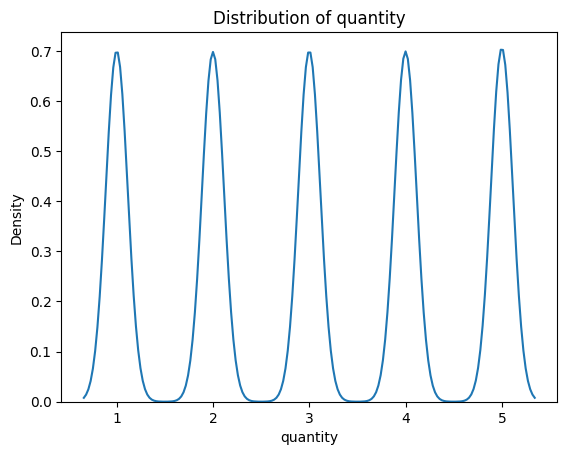

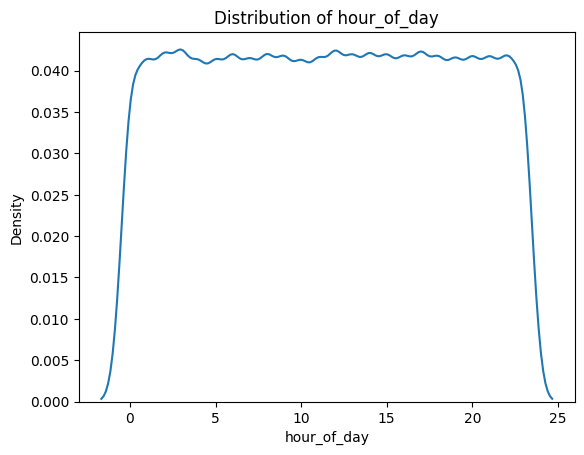

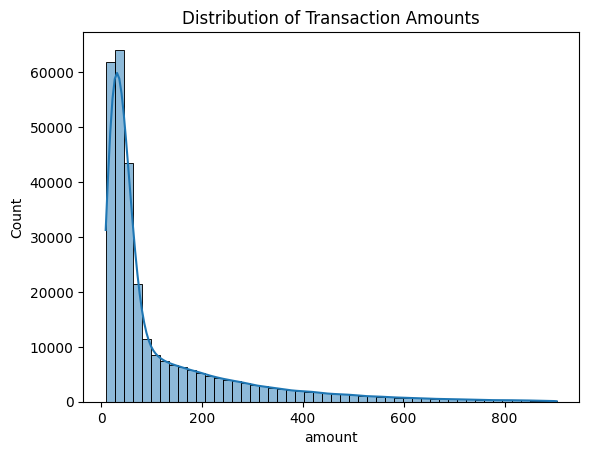

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 若不想用 seaborn 我可以改成纯 matplotlib

# 1. 查看基础信息
print("Basic Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe(include='all').T)

# 2. 缺失值统计
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(missing[missing > 0])

# 3. 基础重复值检查
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# 4. 异常值/分布可视化
num_cols = ['amount', 'user_age', 'account_age_days', 'quantity', 'hour_of_day']
for col in num_cols:
    plt.figure()
    sns.kdeplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. 金额分布
plt.figure()
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()


In [6]:
# 数值型缺失填充
num_cols = ['user_age', 'account_age_days', 'quantity', 'hour_of_day']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# 类别型缺失填充
cat_cols = ['channel', 'browser', 'user_gender', 'payment_method', 'product_category', 'device_type']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 去除amount异常（99分位截断）
upper_limit = df['amount'].quantile(0.99)
df = df[df['amount'] <= upper_limit]

# 处理长尾
df['log_amount'] = np.log1p(df['amount'])

# 处理稀有类别（频率小于1%）
for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < 0.01].index
    df[col] = df[col].replace(rare, 'Other')


Fraud ratio: 6.82%


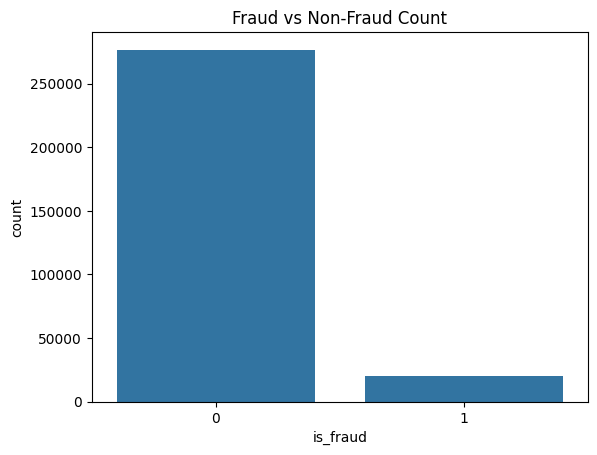

In [7]:
fraud_ratio = df['is_fraud'].mean()
print(f"Fraud ratio: {fraud_ratio:.2%}")

sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()


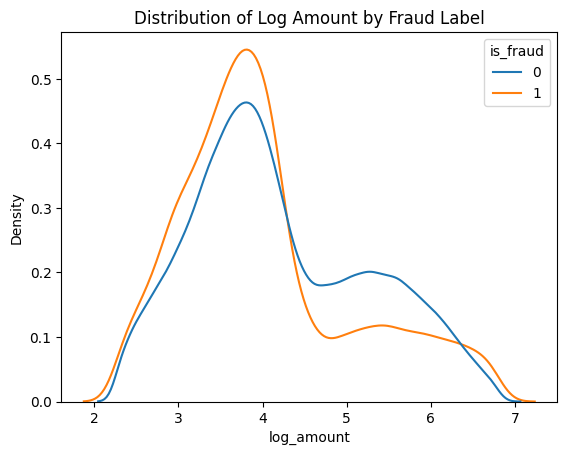

In [8]:
sns.kdeplot(data=df, x='log_amount', hue='is_fraud', common_norm=False)
plt.title("Distribution of Log Amount by Fraud Label")
plt.show()


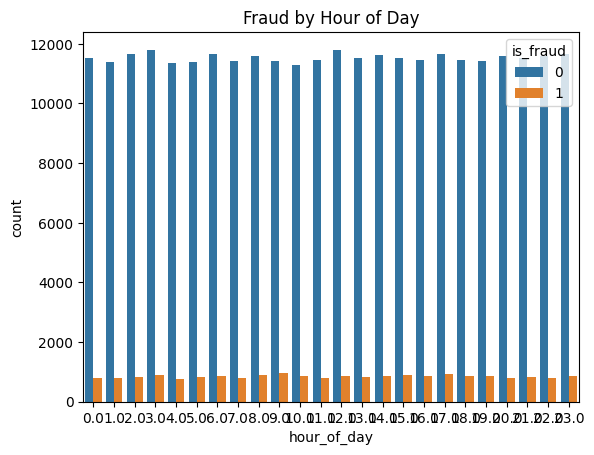

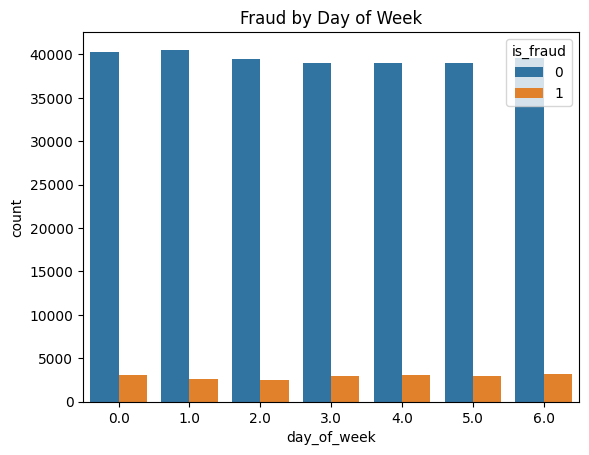

In [9]:
sns.countplot(x='hour_of_day', hue='is_fraud', data=df)
plt.title("Fraud by Hour of Day")
plt.show()

sns.countplot(x='day_of_week', hue='is_fraud', data=df)
plt.title("Fraud by Day of Week")
plt.show()


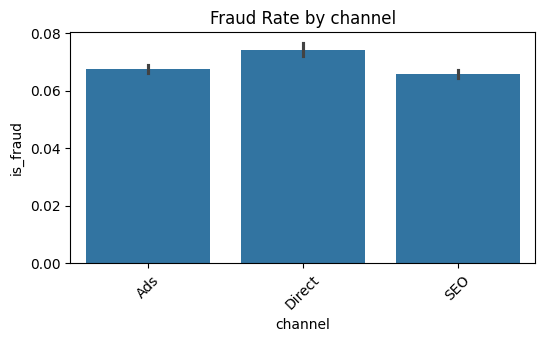

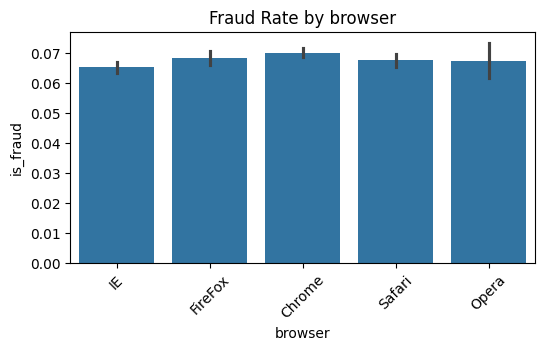

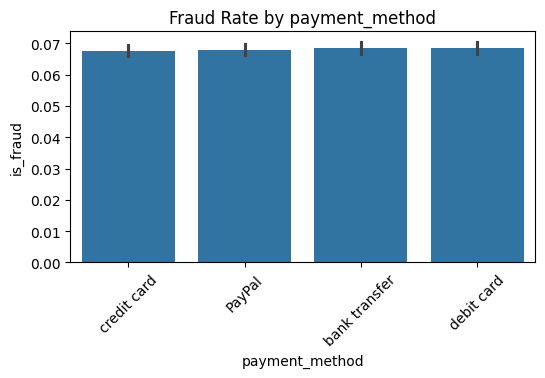

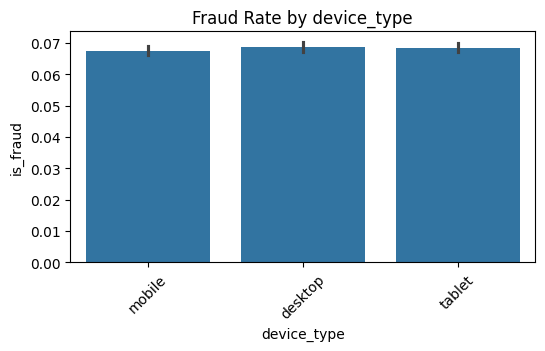

In [10]:
for col in ['channel', 'browser', 'payment_method', 'device_type']:
    plt.figure(figsize=(6,3))
    sns.barplot(x=col, y='is_fraud', data=df, estimator=np.mean)
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()


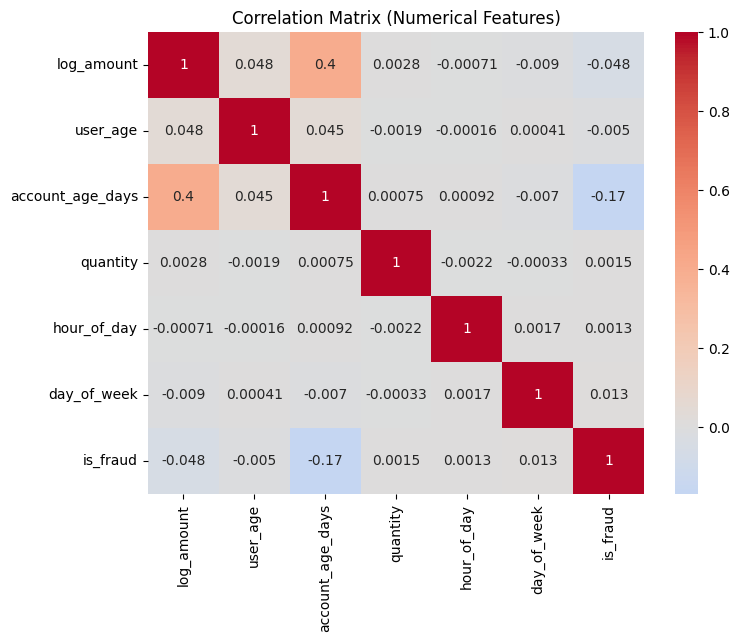

In [11]:
corr = df[['log_amount', 'user_age', 'account_age_days', 'quantity', 'hour_of_day', 'day_of_week', 'is_fraud']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [14]:
import os
from sklearn.model_selection import train_test_split

# 1️⃣ 分层拆分
X_train, X_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['is_fraud'],
    random_state=42
)

print(f"Train size: {len(X_train)}  Test size: {len(X_test)}")
print(f"Fraud ratio (train): {X_train['is_fraud'].mean():.4f}")
print(f"Fraud ratio (test):  {X_test['is_fraud'].mean():.4f}")

# 2️⃣ 创建保存目录
train_dir = "../data/col14_behave/train"
test_dir = "../data/col14_behave/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 3️⃣ 写出数据
train_path = os.path.join(train_dir, "col14_train.csv")
test_path = os.path.join(test_dir, "col14_test.csv")

X_train.to_csv(train_path, index=False)
X_test.to_csv(test_path, index=False)

print(f"✅ Train set saved to: {train_path}")
print(f"✅ Test set saved to:  {test_path}")


Train size: 237600  Test size: 59400
Fraud ratio (train): 0.0682
Fraud ratio (test):  0.0682
✅ Train set saved to: ../data/col14_behave/train/col14_train.csv
✅ Test set saved to:  ../data/col14_behave/test/col14_test.csv


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237600 entries, 0 to 237599
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         237597 non-null  object 
 1   amount            237600 non-null  float64
 2   user_age          237600 non-null  int64  
 3   is_fraud          237600 non-null  int64  
 4   account_age_days  237600 non-null  int64  
 5   hour_of_day       237600 non-null  float64
 6   channel           237600 non-null  object 
 7   browser           237600 non-null  object 
 8   user_gender       237600 non-null  object 
 9   payment_method    237600 non-null  object 
 10  product_category  237600 non-null  object 
 11  quantity          237600 non-null  int64  
 12  device_type       237600 non-null  object 
 13  address_match     237600 non-null  int64  
 14  day_of_week       237597 non-null  float64
 15  log_amount        237600 non-null  float64
dtypes: float

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,237597,236506,2024-01-04 18:20:29,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,237600.0,NaN,NaN,NaN,119.202549,150.928047,9.0,30.0,52.975,146.86,903.35
user_age,237600.0,NaN,NaN,NaN,33.828565,9.390999,-10.0,27.0,33.0,40.0,86.0
is_fraud,237600.0,NaN,NaN,NaN,0.068182,0.252058,0.0,0.0,0.0,0.0,1.0
account_age_days,237600.0,NaN,NaN,NaN,117.637264,100.510151,0.0,40.0,87.0,177.0,365.0
hour_of_day,237600.0,NaN,NaN,NaN,11.505135,6.917282,0.0,6.0,12.0,17.0,23.0
channel,237600,3,SEO,95562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
browser,237600,5,Chrome,96274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_gender,237600,2,M,128827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,237600,4,credit card,59699,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
timestamp      3
day_of_week    3
dtype: int64

Number of duplicate rows: 0


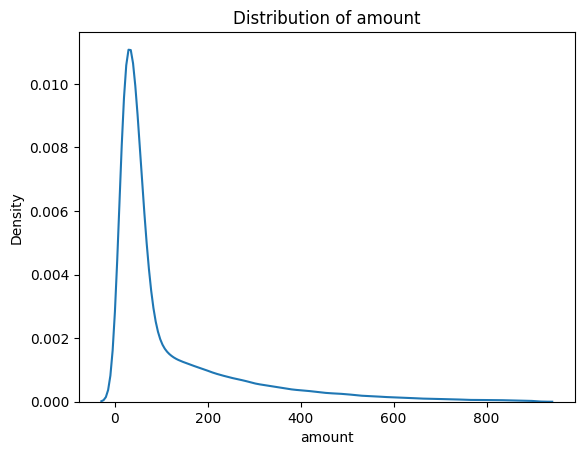

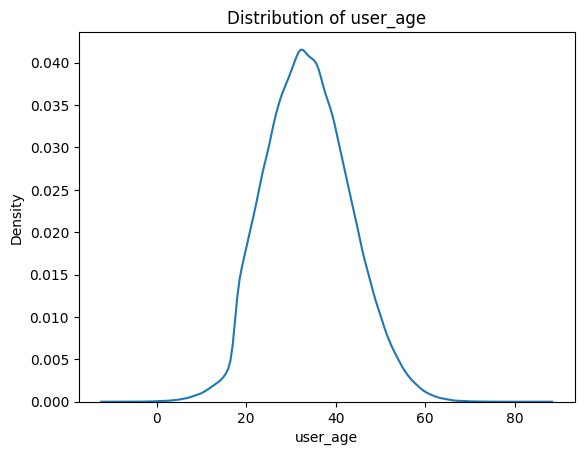

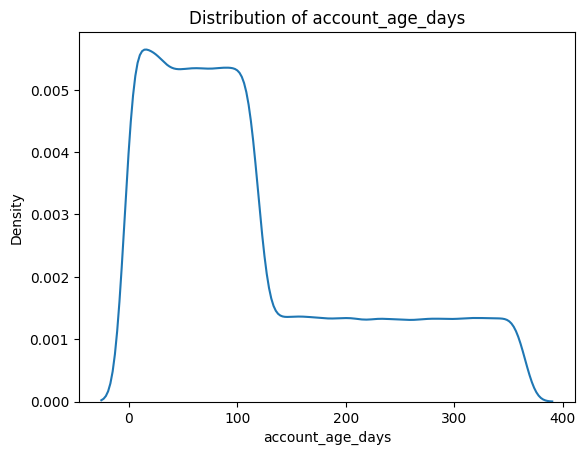

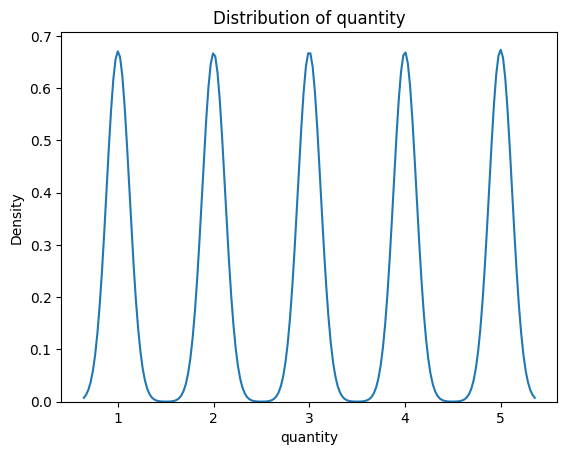

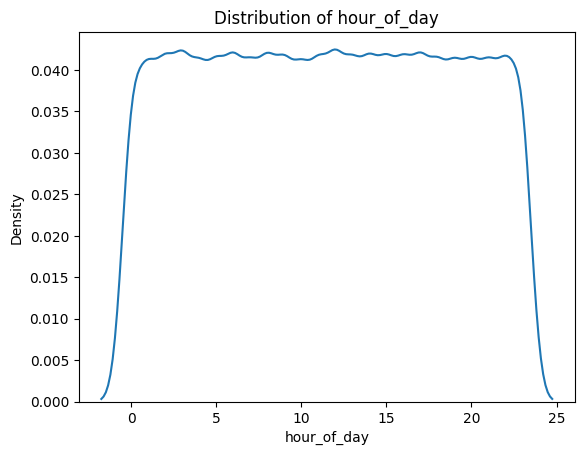

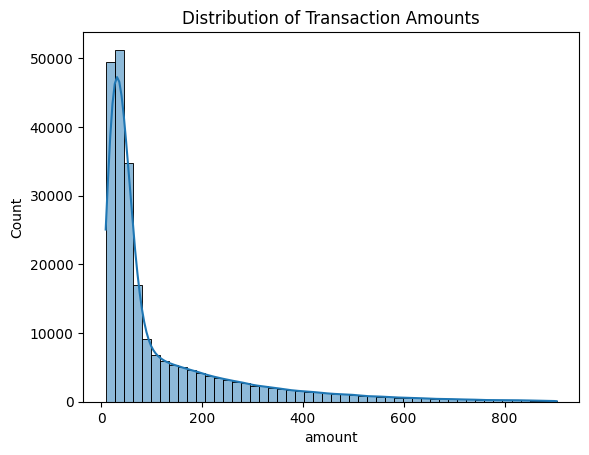

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 若不想用 seaborn 我可以改成纯 matplotlib

# 1. 查看基础信息
print("Basic Info:")
df = pd.read_csv("/usr1/home/s124mdg53_07/wang/FYP/data/col14_behave/train/col14_train.csv")
df.info()

print("\nDescriptive Statistics:")
display(df.describe(include='all').T)

# 2. 缺失值统计
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(missing[missing > 0])

# 3. 基础重复值检查
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# 4. 异常值/分布可视化
num_cols = ['amount', 'user_age', 'account_age_days', 'quantity', 'hour_of_day']
for col in num_cols:
    plt.figure()
    sns.kdeplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. 金额分布
plt.figure()
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()


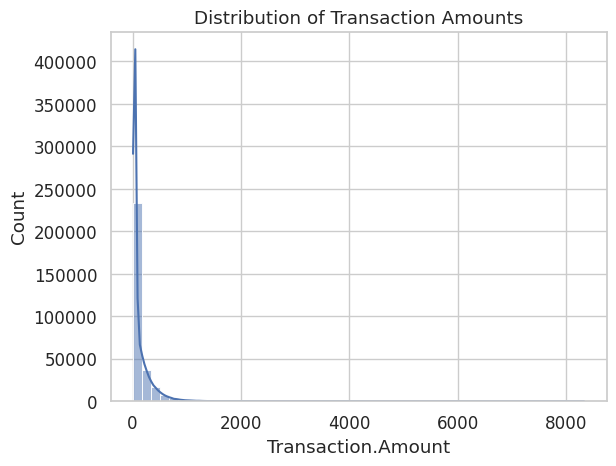

In [9]:
raw = pd.read_csv("/usr1/home/s124mdg53_07/wang/FYP/rawdata/col14_behave/merged_dataset.csv")
plt.figure()
sns.histplot(raw['Transaction.Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid", font_scale=1.1)


def clean_col14(raw_path: str, save_dir: str):
    """
    清理 col14 数据集并生成 EDA 图表。
    遵循统一 schema.json，输出 train/test 数据。
    """
    print("=== Loading raw dataset ===")
    df = pd.read_csv(raw_path)
    print(f"Raw shape: {df.shape}")

    # === 1️⃣ 重命名列 ===
    rename_map = {
        'Transaction.Date': 'timestamp',
        'Transaction.Amount': 'amount',
        'Customer.Age': 'user_age',
        'Is.Fraudulent': 'is_fraud',
        'Account.Age.Days': 'account_age_days',
        'Transaction.Hour': 'hour_of_day',
        'source': 'channel',
        'browser': 'browser',
        'sex': 'user_gender',
        'Payment.Method': 'payment_method',
        'Product.Category': 'product_category',
        'Quantity': 'quantity',
        'Device.Used': 'device_type',
        'Address.Match': 'address_match'
    }
    df = df.rename(columns=rename_map)

    # === 2️⃣ 类型与缺失处理 ===
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['is_fraud'] = df['is_fraud'].astype(int)
    df['address_match'] = df['address_match'].map({'Yes': 1, 'No': 0}).fillna(1).astype(int)
    df['amount'] = df['amount'].astype(float)
    df['user_age'] = df['user_age'].fillna(df['user_age'].median()).astype(int)
    df['account_age_days'] = df['account_age_days'].fillna(df['account_age_days'].median()).astype(int)

    # === 3️⃣ 时间特征 ===
    df = df.dropna(subset=['timestamp']).copy()
    df['hour_of_day'] = df['timestamp'].dt.hour.astype(int)
    df['day_of_week'] = df['timestamp'].dt.dayofweek.astype(int)


    # === 4️⃣ 异常与长尾处理 ===
    upper = df['amount'].quantile(0.99)
    df = df[df['amount'] <= upper]
    df['log_amount'] = np.log1p(df['amount'])
    df.drop(columns=['amount'], inplace=True)  # 避免冗余

    # === 5️⃣ 类别缺失与稀有处理 ===
    cat_cols = ['channel', 'browser', 'user_gender', 'payment_method', 'product_category', 'device_type']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < 0.01].index
        df[col] = df[col].replace(rare, 'Other')

    print("\n=== Cleaned Data Types ===")
    print(df.dtypes)

    # === 6️⃣ 精炼 EDA 可视化 ===
    print("\n=== Generating EDA visualizations ===")
    os.makedirs(os.path.join(save_dir, "eda"), exist_ok=True)

    # Fraud ratio
    fraud_ratio = df['is_fraud'].mean()
    print(f"Fraud ratio: {fraud_ratio:.3%}")

    plt.figure(figsize=(5, 3))
    sns.countplot(x='is_fraud', data=df)
    plt.title(f"Fraud vs Non-Fraud (Fraud rate={fraud_ratio:.2%})")
    plt.savefig(os.path.join(save_dir, "eda", "fraud_ratio.png"), bbox_inches='tight')
    plt.close()

    # Distribution of log_amount
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x='log_amount', hue='is_fraud', common_norm=False)
    plt.title("Distribution of log_amount by Fraud Label")
    plt.savefig(os.path.join(save_dir, "eda", "log_amount_by_fraud.png"), bbox_inches='tight')
    plt.close()

    # Fraud by hour_of_day
    plt.figure(figsize=(7, 4))
    sns.countplot(x='hour_of_day', hue='is_fraud', data=df)
    plt.title("Fraud Count by Hour of Day")
    plt.savefig(os.path.join(save_dir, "eda", "fraud_by_hour.png"), bbox_inches='tight')
    plt.close()

    # Fraud by channel
    plt.figure(figsize=(6, 4))
    sns.barplot(x='channel', y='is_fraud', data=df, estimator=np.mean)
    plt.title("Fraud Rate by Channel")
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, "eda", "fraud_rate_by_channel.png"), bbox_inches='tight')
    plt.close()

    # Correlation matrix (numeric only)
    corr = df[['log_amount', 'user_age', 'account_age_days', 'quantity',
               'hour_of_day', 'day_of_week', 'is_fraud']].corr()
    plt.figure(figsize=(7, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Matrix")
    plt.savefig(os.path.join(save_dir, "eda", "correlation_matrix.png"), bbox_inches='tight')
    plt.close()

    # === 7️⃣ 分层拆分并保存 ===
    print("\n=== Stratified train-test split ===")
    X_train, X_test = train_test_split(
        df, test_size=0.2, stratify=df['is_fraud'], random_state=42
    )

    train_dir = os.path.join(save_dir, "train")
    test_dir = os.path.join(save_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    train_path = os.path.join(train_dir, "col14_train.csv")
    test_path = os.path.join(test_dir, "col14_test.csv")

    X_train.to_csv(train_path, index=False)
    X_test.to_csv(test_path, index=False)

    print(f"✅ Train set saved to: {train_path}")
    print(f"✅ Test set saved to:  {test_path}")
    print(f"✅ EDA figures saved under: {os.path.join(save_dir, 'eda')}")

    return df


if __name__ == "__main__":
    raw_path = "/usr1/home/s124mdg53_07/wang/FYP/rawdata/col14_behave/merged_dataset.csv"
    save_dir = "../data/col14_behave"
    clean_col14(raw_path, save_dir)


=== Loading raw dataset ===
Raw shape: (300000, 14)

=== Cleaned Data Types ===
timestamp           datetime64[ns]
user_age                     int64
is_fraud                     int64
account_age_days             int64
hour_of_day                  int64
channel                     object
browser                     object
user_gender                 object
payment_method              object
product_category            object
quantity                     int64
device_type                 object
address_match                int64
day_of_week                  int64
log_amount                 float64
dtype: object

=== Generating EDA visualizations ===
Fraud ratio: 6.818%

=== Stratified train-test split ===
✅ Train set saved to: ../data/col14_behave/train/col14_train.csv
✅ Test set saved to:  ../data/col14_behave/test/col14_test.csv
✅ EDA figures saved under: ../data/col14_behave/eda


# COL16

In [10]:
col16 = pd.read_csv("/usr1/home/s124mdg53_07/wang/FYP/rawdata/col16_raw/Fraudulent_E-Commerce_Transaction_Data_2.csv")

In [11]:
col16.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [12]:
col16.columns.tolist()

['Transaction ID',
 'Customer ID',
 'Transaction Amount',
 'Transaction Date',
 'Payment Method',
 'Product Category',
 'Quantity',
 'Customer Age',
 'Customer Location',
 'Device Used',
 'IP Address',
 'Shipping Address',
 'Billing Address',
 'Is Fraudulent',
 'Account Age Days',
 'Transaction Hour']

In [14]:
col16.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [15]:
import json, re, math, numpy as np, pandas as pd
from datetime import datetime

# ========= 1) 配置 =========
expected_schema = {
    "Transaction ID": "object",
    "Customer ID": "object",
    "Transaction Amount": "float64",
    "Transaction Date": "object",
    "Payment Method": "object",
    "Product Category": "object",
    "Quantity": "int64",
    "Customer Age": "int64",
    "Customer Location": "object",
    "Device Used": "object",
    "IP Address": "object",
    "Shipping Address": "object",
    "Billing Address": "object",
    "Is Fraudulent": "int64",
    "Account Age Days": "int64",
    "Transaction Hour": "int64"
}

input_csv = "../rawdata/col16_raw/Fraudulent_E-Commerce_Transaction_Data_2.csv"   # ←←← 修改为你的数据文件
output_json = "col16_quality_report.json"
TOPK = 10

EMPTY_LIKE = set(["", " ", "na", "n/a", "null", "none", "unknown", "nan"])

# ========= 2) 工具函数 =========
def pct(x, n): 
    return float(x) / n if n else 0.0

def is_ipv4(s):
    try:
        parts = s.split(".")
        if len(parts) != 4: return False
        for p in parts:
            if not p.isdigit(): return False
            if not (0 <= int(p) <= 255): return False
        return True
    except:
        return False

def empty_like_count(series):
    return int(series.fillna("").astype(str).str.strip().str.lower().isin(EMPTY_LIKE).sum())

def iqr_outliers(s):
    q1, q3 = np.nanpercentile(s, 25), np.nanpercentile(s, 75)
    iqr = q3 - q1
    low_t = q1 - 1.5 * iqr
    high_t = q3 + 1.5 * iqr
    low = int((s < low_t).sum())
    high = int((s > high_t).sum())
    return dict(iqr=float(iqr), out_low=low, out_high=high, low_t=float(low_t), high_t=float(high_t))

# ========= 3) 读取数据 =========
df = pd.read_csv(input_csv)
n_rows, n_cols = df.shape

# ========= 4) schema 检查 =========
observed_schema = {c: str(df[c].dtype) for c in df.columns}
missing_columns = [c for c in expected_schema.keys() if c not in df.columns]
extra_columns   = [c for c in df.columns if c not in expected_schema]
mismatch_columns = []
for c in expected_schema:
    if c in df.columns:
        if expected_schema[c] != observed_schema[c]:
            mismatch_columns.append(c)

schema_check = {
    "expected": expected_schema,
    "observed": observed_schema,
    "mismatch_columns": mismatch_columns,
    "missing_columns": missing_columns,
    "extra_columns": extra_columns
}

# ========= 5) 缺失值与唯一值 =========
missing_values = {
    c: {
        "missing_count": int(df[c].isna().sum()),
        "missing_pct": pct(int(df[c].isna().sum()), n_rows)
    }
    for c in df.columns
}

uniques = {}
for c in df.columns:
    try:
        sample_vals = df[c].dropna().astype(str).unique()[:3].tolist()
    except Exception:
        sample_vals = []
    uniques[c] = {"n_unique": int(df[c].nunique(dropna=True)), "sample_values": sample_vals}

# ========= 6) 数值型列统计 =========
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
numeric_summary = {}
for c in numeric_cols:
    s = pd.to_numeric(df[c], errors="coerce")
    desc = {
        "min": float(np.nanmin(s)) if s.notna().any() else None,
        "p1": float(np.nanpercentile(s, 1)) if s.notna().any() else None,
        "p5": float(np.nanpercentile(s, 5)) if s.notna().any() else None,
        "p25": float(np.nanpercentile(s, 25)) if s.notna().any() else None,
        "median": float(np.nanmedian(s)) if s.notna().any() else None,
        "p75": float(np.nanpercentile(s, 75)) if s.notna().any() else None,
        "p95": float(np.nanpercentile(s, 95)) if s.notna().any() else None,
        "p99": float(np.nanpercentile(s, 99)) if s.notna().any() else None,
        "max": float(np.nanmax(s)) if s.notna().any() else None,
        "mean": float(np.nanmean(s)) if s.notna().any() else None,
        "std": float(np.nanstd(s)) if s.notna().any() else None,
        "zeros": int((s == 0).sum()),
        "negatives": int((s < 0).sum())
    }
    iqr_info = iqr_outliers(s.dropna()) if s.notna().any() else {"iqr": None, "out_low": 0, "out_high": 0, "low_t": None, "high_t": None}
    desc.update({
        "iqr": iqr_info["iqr"],
        "outlier_low_count": int(iqr_info["out_low"]),
        "outlier_high_count": int(iqr_info["out_high"]),
        "outlier_low_thresh": iqr_info["low_t"],
        "outlier_high_thresh": iqr_info["high_t"]
    })
    numeric_summary[c] = desc

# ========= 7) 分类列统计 =========
categorical_cols = [c for c in df.columns if pd.api.types.is_object_dtype(df[c])]
categorical_summary = {}
for c in categorical_cols:
    s = df[c].astype(str)
    vc = s.value_counts(dropna=False)
    total = int(vc.sum())
    topk = [{"value": str(idx), "count": int(cnt), "pct": pct(int(cnt), total)} for idx, cnt in vc.head(TOPK).items()]
    rare_threshold = max(1, int(0.005 * total))  # 0.5%
    rare_values_count = int((vc[vc < rare_threshold]).shape[0])
    categorical_summary[c] = {
        "cardinality": int(df[c].nunique(dropna=True)),
        "top_k": topk,
        "rare_values_count": rare_values_count,
        "empty_like_count": empty_like_count(df[c])
    }

# ========= 8) 日期字段检查 =========
date_checks = {}
if "Transaction Date" in df.columns:
    raw = df["Transaction Date"].astype(str)
    parsed = pd.to_datetime(raw, errors="coerce", infer_datetime_format=True)
    parse_success_rate = pct(parsed.notna().sum(), n_rows)
    invalid_examples = raw[parsed.isna()].head(3).tolist()
    date_checks["Transaction Date"] = {
        "parse_success_rate": parse_success_rate,
        "min": parsed.min().strftime("%Y-%m-%d %H:%M:%S") if parsed.notna().any() else None,
        "max": parsed.max().strftime("%Y-%m-%d %H:%M:%S") if parsed.notna().any() else None,
        "invalid_examples": invalid_examples
    }

# ========= 9) ID 唯一性与空值占位 =========
def id_block(col):
    if col not in df.columns:
        return None
    s = df[col].astype(str)
    return {
        "duplicate_count": int(s.duplicated().sum()),
        "empty_like_count": empty_like_count(s),
        "pattern_examples": s.dropna().astype(str).head(3).tolist()
    }

id_checks = {
    "Transaction ID": id_block("Transaction ID"),
    "Customer ID": id_block("Customer ID")
}

# ========= 10) 标签分布与不均衡 =========
label_checks = {}
if "Is Fraudulent" in df.columns:
    y = pd.to_numeric(df["Is Fraudulent"], errors="coerce")
    counts = {
        "0": int((y == 0).sum()),
        "1": int((y == 1).sum())
    }
    pos_ratio = pct(counts["1"], counts["0"] + counts["1"])
    label_checks["Is Fraudulent"] = {
        "counts": counts,
        "ratio_positive": pos_ratio,
        "imbalance_flag": bool(pos_ratio < 0.05 or pos_ratio > 0.95)
    }

# ========= 11) 一致性/逻辑规则 =========
def violations_count(mask):
    return int(mask.sum())

consistency_checks = {}
if "Transaction Amount" in df.columns:
    amt = pd.to_numeric(df["Transaction Amount"], errors="coerce")
    consistency_checks["amount_nonnegative"] = {"violations": violations_count(amt < 0)}

if "Quantity" in df.columns:
    qty = pd.to_numeric(df["Quantity"], errors="coerce")
    consistency_checks["quantity_positive"] = {"violations": violations_count(qty <= 0)}

if "Transaction Hour" in df.columns:
    hh = pd.to_numeric(df["Transaction Hour"], errors="coerce")
    consistency_checks["hour_range_valid"] = {"violations": violations_count((hh < 0) | (hh > 23))}

if "Account Age Days" in df.columns:
    aad = pd.to_numeric(df["Account Age Days"], errors="coerce")
    consistency_checks["account_age_nonnegative"] = {"violations": violations_count(aad < 0)}

if "Customer Age" in df.columns:
    age = pd.to_numeric(df["Customer Age"], errors="coerce")
    consistency_checks["age_reasonable"] = {"violations": violations_count((age < 13) | (age > 100)), "rule": ">= 13 & <= 100"}

# ========= 12) 字符串质量（IP与地址） =========
string_quality = {}

if "IP Address" in df.columns:
    ip_s = df["IP Address"].fillna("").astype(str).str.strip()
    valid_rate = pct(ip_s.apply(is_ipv4).sum(), n_rows)
    invalid_examples = ip_s[~ip_s.apply(is_ipv4)].head(3).tolist()
    string_quality["IP Address"] = {"ipv4_valid_rate": valid_rate, "invalid_examples": invalid_examples}

for addr_col in ["Shipping Address", "Billing Address"]:
    if addr_col in df.columns:
        s = df[addr_col].astype(str)
        string_quality[addr_col] = {
            "avg_len": float(s.str.len().mean()),
            "empty_like_count": empty_like_count(s)
        }

# ========= 13) 行级异常示例 =========
row_level_anomalies = {}
if {"Transaction Amount", "Quantity"} <= set(df.columns):
    amt = pd.to_numeric(df["Transaction Amount"], errors="coerce")
    qty = pd.to_numeric(df["Quantity"], errors="coerce")
    row_level_anomalies["suspicious_amount_zero"] = int((amt == 0).sum())
    row_level_anomalies["amount_vs_quantity_mismatch"] = int(((amt > 0) & (qty <= 0)).sum())

# ========= 14) 汇总并输出 =========
report = {
    "dataset_name": "col16",
    "generated_at": datetime.utcnow().isoformat(),
    "shape": {"rows": n_rows, "columns": n_cols},
    "schema_check": schema_check,
    "missing_values": missing_values,
    "uniques": uniques,
    "numeric_summary": numeric_summary,
    "categorical_summary": categorical_summary,
    "date_checks": date_checks,
    "id_checks": id_checks,
    "label_checks": label_checks,
    "consistency_checks": consistency_checks,
    "string_quality": string_quality,
    "row_level_anomalies": row_level_anomalies,
    "notes": []
}

with open(output_json, "w", encoding="utf-8") as f:
    json.dump(report, f, ensure_ascii=False, indent=2)

print(f"[OK] Quality report written to {output_json}")


[OK] Quality report written to col16_quality_report.json


/tmp/ipykernel_2072075/980347841.py:147: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(raw, errors="coerce", infer_datetime_format=True)


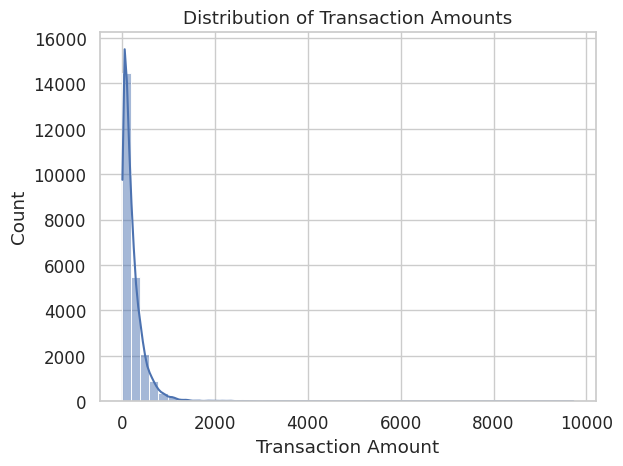

In [16]:
plt.figure()
sns.histplot(col16['Transaction Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

In [26]:
import pandas as pd
import numpy as np
import os

def clean_col16(raw_path, save_path):
    """
    清洗 col16 数据集：
    1. 修正字段命名和类型
    2. 删除 user_age 或 amount 为负的行
    3. 添加 log_amount、hour_of_day、day_of_week、address_match
    4. 不做任何编码/采样/归一化
    """
    df = pd.read_csv(raw_path)

    # === 1️⃣ 字段重命名 ===
    rename_map = {
        'Transaction Date': 'timestamp',
        'Transaction Amount': 'amount',
        'Customer ID': 'user_id',
        'Customer Age': 'user_age',
        'Account Age Days': 'account_age_days',
        'Customer Location': 'channel',
        'Device Used': 'device_type',
        'Payment Method': 'payment_method',
        'Product Category': 'product_category',
        'Quantity': 'quantity',
        'Is Fraudulent': 'is_fraud'
    }
    df.rename(columns=rename_map, inplace=True)

    # === 2️⃣ 类型修正 ===
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
    df['user_age'] = pd.to_numeric(df['user_age'], errors='coerce')
    df['account_age_days'] = pd.to_numeric(df['account_age_days'], errors='coerce')
    df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').astype(int)
    df['is_fraud'] = pd.to_numeric(df['is_fraud'], errors='coerce').astype(int)

    # === 3️⃣ 删除负值行 ===
    before = len(df)
    df = df[(df['amount'] >= 0) & (df['user_age'] >= 0)]
    after = len(df)
    print(f"[INFO] Removed {before - after} rows with negative amount or age")

    # === 4️⃣ 派生特征 ===
    df['log_amount'] = np.log1p(df['amount'])
    df['hour_of_day'] = df['timestamp'].dt.hour.astype(int)
    df['day_of_week'] = df['timestamp'].dt.dayofweek.astype(int)

    # === 5️⃣ 地址匹配 ===
    if 'Shipping Address' in df.columns and 'Billing Address' in df.columns:
        df['address_match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)
    else:
        df['address_match'] = 0

    # === 6️⃣ 清理字符串列 ===
    str_cols = df.select_dtypes(include='object').columns
    df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

    # === 7️⃣ 统一字段顺序 ===
    unified_order = [
        'timestamp', 'hour_of_day', 'day_of_week',
        'log_amount',
        'user_id', 'user_age', 'account_age_days',
        'channel', 'device_type', 'payment_method',
        'product_category', 'quantity', 'address_match',
        'is_fraud'
    ]
    df = df[[c for c in unified_order if c in df.columns]]

    # === 8️⃣ 保存 ===
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    df.to_csv(save_path, index=False)
    print(f"[OK] Saved cleaned file to {save_path} with shape {df.shape}")

# 示例调用：
clean_col16("../rawdata/col16_raw/Fraudulent_E-Commerce_Transaction_Data.csv", "../data/col16_raw/train/train_clean.csv")
clean_col16("../rawdata/col16_raw/Fraudulent_E-Commerce_Transaction_Data_2.csv", "../data/col16_raw/test/test_clean.csv")


[INFO] Removed 258 rows with negative amount or age
[OK] Saved cleaned file to ../data/col16_raw/train/train_clean.csv with shape (1472694, 14)
[INFO] Removed 1 rows with negative amount or age
[OK] Saved cleaned file to ../data/col16_raw/test/test_clean.csv with shape (23633, 14)


In [27]:
train = pd.read_csv("../data/col16_raw/train/train_clean.csv")

In [28]:
train.head()

,timestamp,hour_of_day,day_of_week,log_amount,user_id,user_age,account_age_days,channel,device_type,payment_method,product_category,quantity,address_match,is_fraud
0,2024-02-20 05:58:41,5,1,4.079062,d1b87f62-51b2-493b-ad6a-77e0fe13e785,17,30,Amandaborough,tablet,bank transfer,electronics,1,1,0
1,2024-02-25 08:09:45,8,6,5.968605,37de64d5-e901-4a56-9ea0-af0c24c069cf,40,72,East Timothy,desktop,debit card,electronics,2,1,0
2,2024-03-18 03:42:55,3,0,4.906681,1bac88d6-4b22-409a-a06b-425119c57225,22,63,Davismouth,tablet,PayPal,home & garden,2,1,0
3,2024-03-16 20:41:31,20,5,5.425699,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,31,124,Lynnberg,desktop,bank transfer,clothing,5,1,0
4,2024-01-15 05:08:17,5,0,4.808356,45071bc5-9588-43ea-8093-023caec8ea1c,51,158,South Nicole,tablet,bank transfer,clothing,2,1,0


address_match
1    1325202
0     147492
Name: count, dtype: int64

Train: (1472694, 14), Test: (23633, 14)


/tmp/ipykernel_2072075/2823867922.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values*100, palette='viridis', ax=ax)


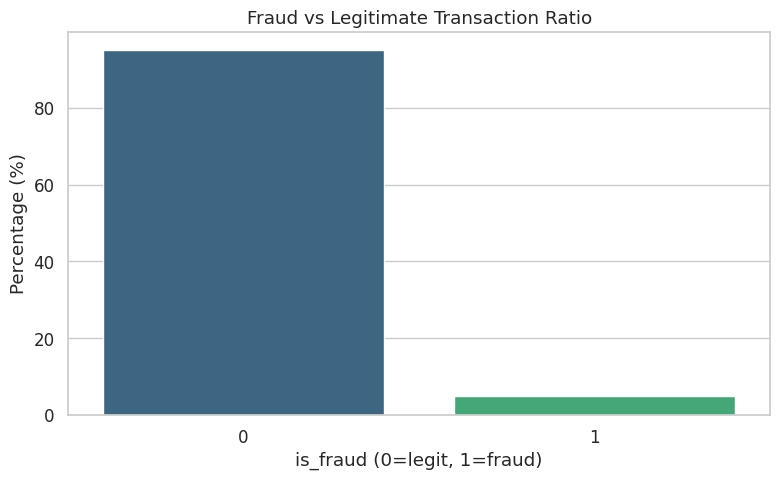

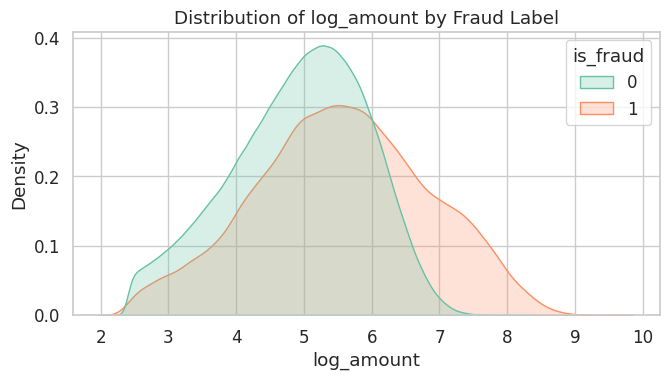

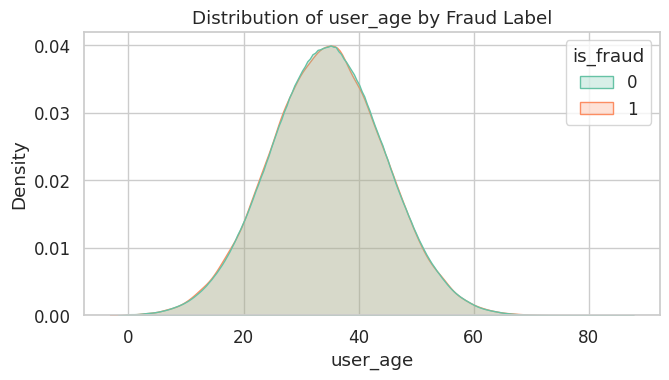

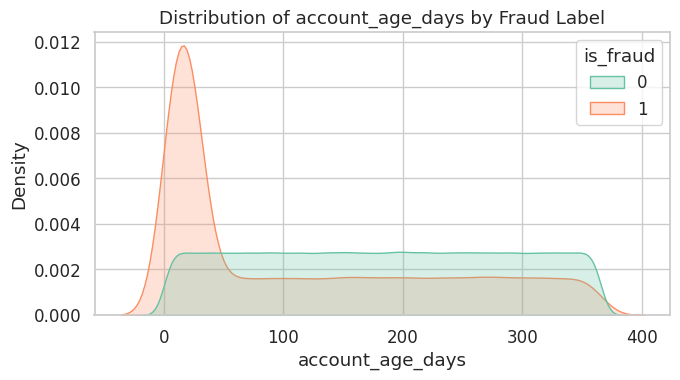

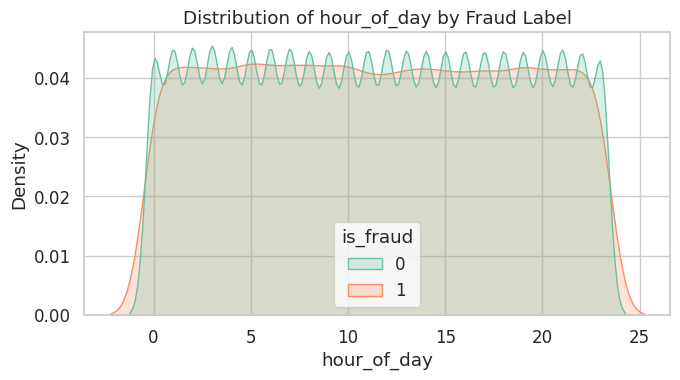

/tmp/ipykernel_2072075/2823867922.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate, x=col, y='is_fraud', palette='crest')


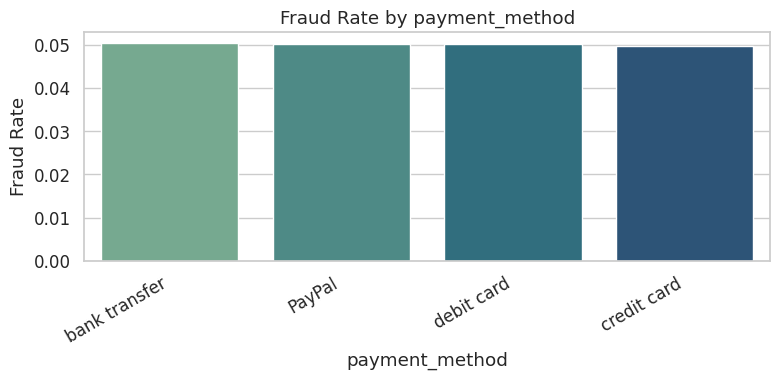

/tmp/ipykernel_2072075/2823867922.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate, x=col, y='is_fraud', palette='crest')


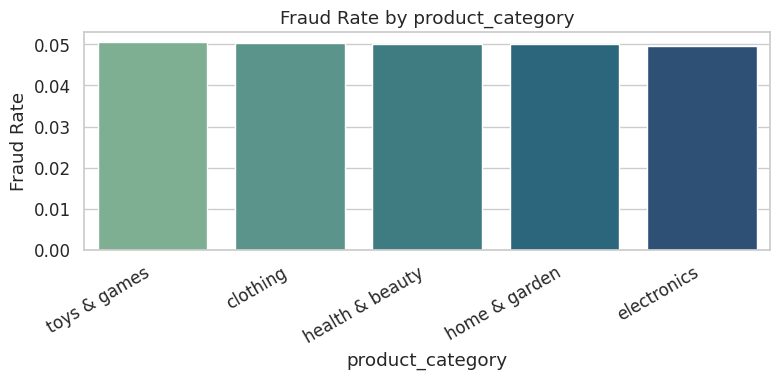

/tmp/ipykernel_2072075/2823867922.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate, x=col, y='is_fraud', palette='crest')


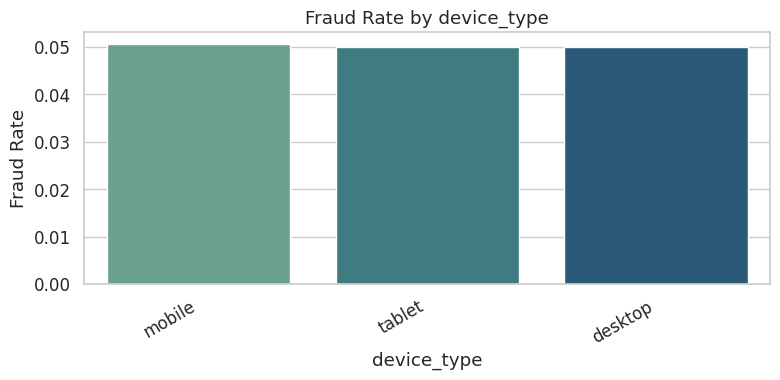

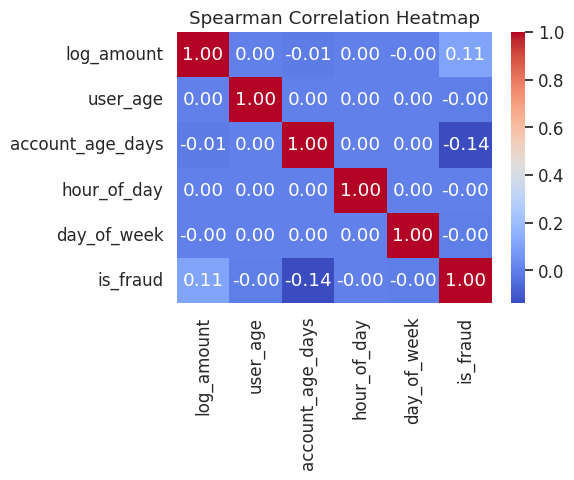

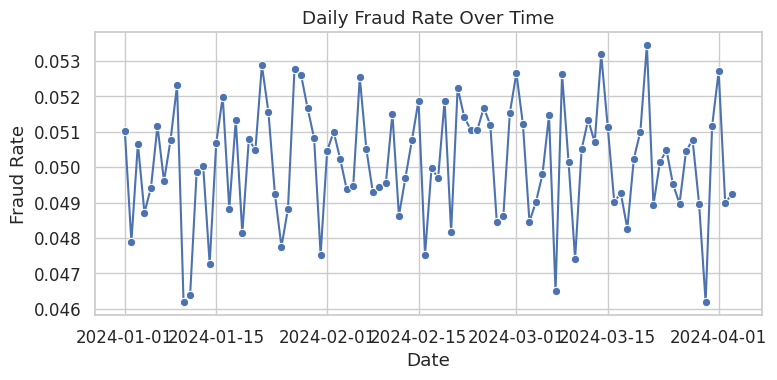

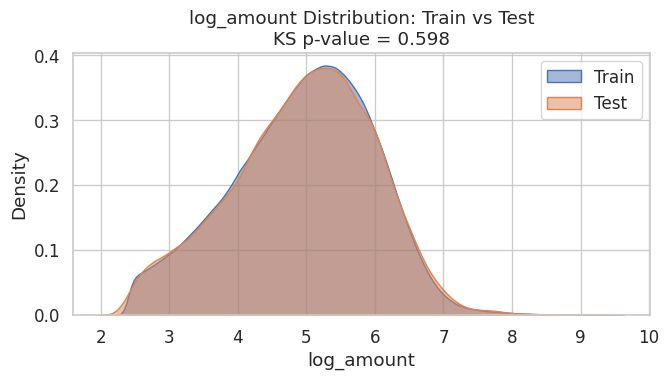

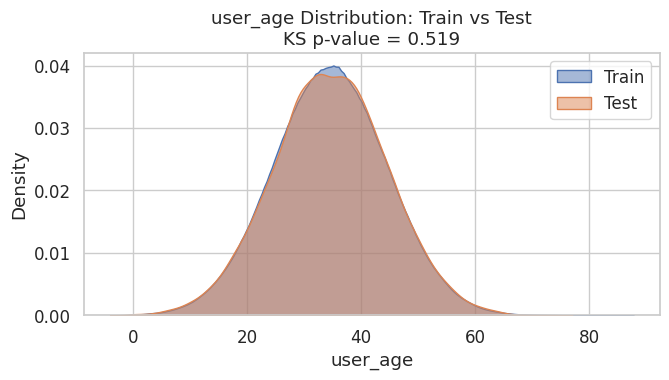

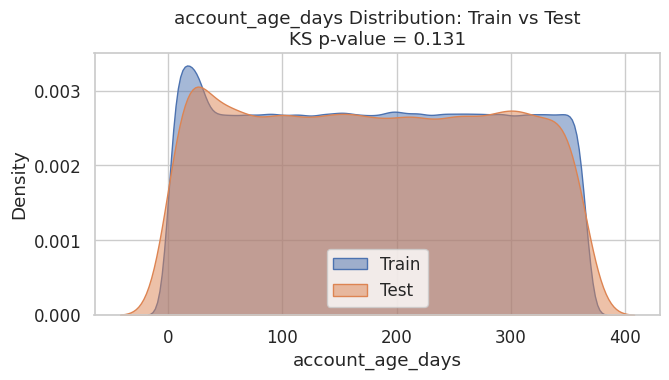

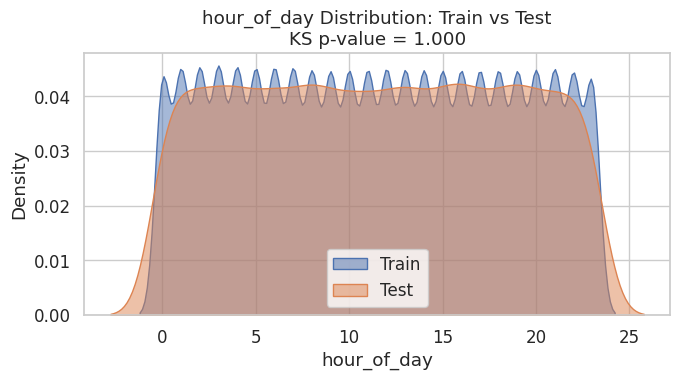

Kolmogorov–Smirnov test for distribution similarity:
                  KS_statistic   p_value
log_amount            0.005024  0.598233
user_age              0.005339  0.519450
account_age_days      0.007645  0.131195
hour_of_day           0.002290  0.999691


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# ====== 1️⃣ 读取数据 ======
train = pd.read_csv("../data/col16_raw/train/train_clean.csv")
test = pd.read_csv("../data/col16_raw/test/test_clean.csv")

print(f"Train: {train.shape}, Test: {test.shape}")

# 论文风格设置
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,5)

# ====== 2️⃣ Fraud 占比 ======
fig, ax = plt.subplots()
fraud_counts = train['is_fraud'].value_counts(normalize=True)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values*100, palette='viridis', ax=ax)
ax.set_title("Fraud vs Legitimate Transaction Ratio")
ax.set_xlabel("is_fraud (0=legit, 1=fraud)")
ax.set_ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

# ====== 3️⃣ Fraud 与连续变量关系 ======
num_cols = ['log_amount', 'user_age', 'account_age_days', 'hour_of_day']
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=train, x=col, hue='is_fraud', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribution of {col} by Fraud Label")
    plt.tight_layout()
    plt.show()

# ====== 4️⃣ Fraud 与分类变量关系 ======
cat_cols = ['payment_method', 'product_category', 'device_type']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    fraud_rate = (
        train.groupby(col)['is_fraud']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    sns.barplot(data=fraud_rate, x=col, y='is_fraud', palette='crest')
    plt.xticks(rotation=30, ha='right')
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.tight_layout()
    plt.show()

# ====== 5️⃣ 数值特征相关性 ======
corr = train[['log_amount','user_age','account_age_days','hour_of_day','day_of_week','is_fraud']].corr(method='spearman')
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()

# ====== 6️⃣ Fraud 时间分布（时间序列） ======
train['timestamp'] = pd.to_datetime(train['timestamp'], errors='coerce')

df_time = (
    train.groupby(train['timestamp'].dt.floor('D'))['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'timestamp': 'date'})
)

plt.figure(figsize=(8,4))
sns.lineplot(data=df_time, x='date', y='is_fraud', marker='o')
plt.title("Daily Fraud Rate Over Time")
plt.ylabel("Fraud Rate")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


# ====== 7️⃣ Train/Test 分布一致性检查 ======
shared_cols = ['log_amount','user_age','account_age_days','hour_of_day']
ks_results = {}

for col in shared_cols:
    ks_stat, p_val = ks_2samp(train[col], test[col])
    ks_results[col] = {"KS_statistic": ks_stat, "p_value": p_val}

    plt.figure(figsize=(7,4))
    sns.kdeplot(train[col], label='Train', fill=True, alpha=0.5)
    sns.kdeplot(test[col], label='Test', fill=True, alpha=0.5)
    plt.title(f"{col} Distribution: Train vs Test\nKS p-value = {p_val:.3f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

ks_df = pd.DataFrame(ks_results).T
print("Kolmogorov–Smirnov test for distribution similarity:")
print(ks_df)


# counterfeit

In [31]:
import pandas as pd
import json
from pathlib import Path

def summarize_df(df, name):
    """生成 DataFrame 的概要统计信息"""
    summary = {}
    for col in df.columns:
        series = df[col]
        summary[col] = {
            "dtype": str(series.dtype),
            "n_missing": int(series.isna().sum()),
            "n_unique": int(series.nunique()),
            "sample_values": series.dropna().astype(str).head(5).tolist(),
        }
    return {"dataset_name": name, "n_rows": len(df), "n_cols": len(df.columns), "columns": summary}

def analyze_datasets(product_path, transaction_path, output_dir="../"):
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # === 1️⃣ 读取数据 ===
    df_prod = pd.read_csv(product_path)
    df_tx = pd.read_csv(transaction_path)

    # === 2️⃣ 生成统计信息 ===
    summary_prod = summarize_df(df_prod, "counterfeit_products")
    summary_tx = summarize_df(df_tx, "counterfeit_transactions")

    # === 3️⃣ 输出为 JSON 文件 ===
    with open(f"{output_dir}/products_summary.json", "w", encoding="utf-8") as f:
        json.dump(summary_prod, f, indent=4, ensure_ascii=False)
    with open(f"{output_dir}/transactions_summary.json", "w", encoding="utf-8") as f:
        json.dump(summary_tx, f, indent=4, ensure_ascii=False)

    print("✅ Summary JSONs generated:")
    print(f"  - {output_dir}/products_summary.json")
    print(f"  - {output_dir}/transactions_summary.json")

if __name__ == "__main__":
    analyze_datasets(
        "../rawdata/counterfeit-product-detection/counterfeit_products.csv",
        "../rawdata/counterfeit-product-detection/counterfeit_transactions.csv"
    )


✅ Summary JSONs generated:
  - ..//products_summary.json
  - ..//transactions_summary.json


In [32]:
p = pd.read_csv("../rawdata/counterfeit-product-detection/counterfeit_products.csv")
t = pd.read_csv("../rawdata/counterfeit-product-detection/counterfeit_transactions.csv")

In [34]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                5000 non-null   object 
 1   seller_id                 5000 non-null   object 
 2   category                  5000 non-null   object 
 3   brand                     5000 non-null   object 
 4   price                     5000 non-null   float64
 5   seller_rating             5000 non-null   float64
 6   seller_reviews            5000 non-null   int64  
 7   product_images            5000 non-null   int64  
 8   description_length        5000 non-null   int64  
 9   shipping_time_days        5000 non-null   int64  
 10  spelling_errors           5000 non-null   int64  
 11  domain_age_days           5000 non-null   int64  
 12  contact_info_complete     5000 non-null   bool   
 13  return_policy_clear       5000 non-null   bool   
 14  payment_

In [36]:
t['total_amount'].describe()

count    3000.000000
mean      431.415573
std       331.140587
min         6.280000
25%       171.685000
50%       322.585000
75%       623.160000
max      1865.660000
Name: total_amount, dtype: float64

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pathlib import Path

def clean_counterfeit_products(raw_path, save_dir="../data/counterfeit_products"):
    df = pd.read_csv(raw_path)
    df.columns = df.columns.str.strip()

    # === 类型转换 ===
    df["listing_date"] = pd.to_datetime(df["listing_date"], errors="coerce")
    df["price"] = df["price"].astype(float)
    df["domain_age_days"] = df["domain_age_days"].fillna(df["domain_age_days"].median()).astype(int)
    df["seller_rating"] = df["seller_rating"].astype(float)
    df["seller_reviews"] = df["seller_reviews"].fillna(0).astype(int)
    df["product_images"] = df["product_images"].fillna(0).astype(int)
    df["description_length"] = df["description_length"].fillna(0).astype(int)
    df["spelling_errors"] = df["spelling_errors"].fillna(0).astype(int)

    # === 派生特征 ===
    df["timestamp"] = df["listing_date"]
    df["hour_of_day"] = df["timestamp"].dt.hour.fillna(0).astype(int)
    df["day_of_week"] = df["timestamp"].dt.dayofweek.fillna(0).astype(int)
    df["amount"] = df["price"]
    df["log_amount"] = np.log1p(df["amount"])
    df["address_match"] = (~df["ip_location_mismatch"]).astype(int)
    df["is_fraud"] = df["is_counterfeit"].astype(int)

    # === 保留关键列 ===
    keep_cols = [
        "timestamp", "hour_of_day", "day_of_week", "amount", "log_amount",
        "seller_id", "category", "brand", "seller_rating", "seller_reviews",
        "product_images", "description_length", "spelling_errors",
        "domain_age_days", "address_match", "is_fraud"
    ]
    df_clean = df[keep_cols].copy()

    # === Stratified Split ===
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(df_clean, df_clean["is_fraud"]):
        train_df = df_clean.iloc[train_idx].reset_index(drop=True)
        test_df = df_clean.iloc[test_idx].reset_index(drop=True)

    # === 保存 ===
    Path(f"{save_dir}/train").mkdir(parents=True, exist_ok=True)
    Path(f"{save_dir}/test").mkdir(parents=True, exist_ok=True)
    train_df.to_csv(f"{save_dir}/train/clean_products.csv", index=False)
    test_df.to_csv(f"{save_dir}/test/clean_products.csv", index=False)
    print(f"✅ Saved cleaned product data to {save_dir}")

if __name__ == "__main__":
    clean_counterfeit_products("../rawdata/counterfeit-product-detection/counterfeit_products.csv")


✅ Saved cleaned product data to ../data/counterfeit_products


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pathlib import Path

def clean_counterfeit_transactions(raw_path, save_dir="../data/counterfeit_transactions"):
    df = pd.read_csv(raw_path)
    df.columns = df.columns.str.strip()

    # === 类型修正 ===
    df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors="coerce")
    df["unit_price"] = df["unit_price"].astype(float)
    df["total_amount"] = df["total_amount"].astype(float)
    df["quantity"] = df["quantity"].fillna(1).astype(int)
    df["customer_age"] = df["customer_age"].astype(int)

    # === 派生特征 ===
    df["timestamp"] = df["transaction_date"]
    df["hour_of_day"] = df["timestamp"].dt.hour.fillna(0).astype(int)
    df["day_of_week"] = df["timestamp"].dt.dayofweek.fillna(0).astype(int)
    df["amount"] = df["total_amount"]
    df["log_amount"] = np.log1p(df["amount"])
    df["address_match"] = (~df["geolocation_mismatch"]).astype(int)
    df["is_fraud"] = df["involves_counterfeit"].astype(int)

    # === 保留核心字段 ===
    keep_cols = [
        "timestamp", "hour_of_day", "day_of_week", "amount", "log_amount",
        "customer_id", "customer_age", "customer_location",
        "payment_method", "quantity", "unit_price", "shipping_cost",
        "delivery_time_days", "discount_applied", "discount_percentage",
        "refund_requested", "velocity_flag", "address_match", "is_fraud"
    ]
    df_clean = df[keep_cols].copy()

    # === Stratified Split ===
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(df_clean, df_clean["is_fraud"]):
        train_df = df_clean.iloc[train_idx].reset_index(drop=True)
        test_df = df_clean.iloc[test_idx].reset_index(drop=True)

    # === 保存 ===
    Path(f"{save_dir}/train").mkdir(parents=True, exist_ok=True)
    Path(f"{save_dir}/test").mkdir(parents=True, exist_ok=True)
    train_df.to_csv(f"{save_dir}/train/clean_transactions.csv", index=False)
    test_df.to_csv(f"{save_dir}/test/clean_transactions.csv", index=False)
    print(f"✅ Saved cleaned transaction data to {save_dir}")

if __name__ == "__main__":
    clean_counterfeit_transactions("../rawdata/counterfeit-product-detection/counterfeit_transactions.csv")


✅ Saved cleaned transaction data to ../data/counterfeit_transactions


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def plot_correlation_matrix(df, dataset_name, save_dir="../eda_plots"):
    """绘制并保存数值型特征的相关性矩阵"""
    Path(f"{save_dir}/{dataset_name}").mkdir(parents=True, exist_ok=True)

    # 仅选择数值列（int/float）
    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.shape[1] < 2:
        print(f"⚠️ {dataset_name}: no numeric columns to compute correlation.")
        return

    # 计算相关系数
    corr = numeric_df.corr(numeric_only=True).round(2)

    # 可视化
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        square=True,
        cbar_kws={"shrink": 0.8},
        linewidths=0.5
    )
    plt.title(f"{dataset_name} - Correlation Matrix", fontsize=13)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/{dataset_name}/correlation_matrix.png", bbox_inches="tight")
    plt.close()

    # 输出与is_fraud最相关的top5特征
    if "is_fraud" in corr.columns:
        top_corr = corr["is_fraud"].drop("is_fraud").sort_values(key=abs, ascending=False).head(5)
        print(f"\n🔍 {dataset_name} | Top correlated features with is_fraud:")
        print(top_corr)
    else:
        print(f"⚠️ {dataset_name}: 'is_fraud' not found in correlation matrix.")

    print(f"✅ Correlation matrix saved to {save_dir}/{dataset_name}/correlation_matrix.png")


In [41]:
if __name__ == "__main__":
    df_prod = pd.read_csv("../data/counterfeit_products/train/clean_products.csv")
    df_tx = pd.read_csv("../data/counterfeit_transactions/train/clean_transactions.csv")

    plot_correlation_matrix(df_prod, "counterfeit_products")
    plot_correlation_matrix(df_tx, "counterfeit_transactions")


🔍 counterfeit_products | Top correlated features with is_fraud:
seller_rating        -0.81
spelling_errors       0.78
product_images       -0.77
description_length   -0.74
domain_age_days      -0.72
Name: is_fraud, dtype: float64
✅ Correlation matrix saved to ../eda_plots/counterfeit_products/correlation_matrix.png

🔍 counterfeit_transactions | Top correlated features with is_fraud:
quantity        0.76
unit_price     -0.54
amount          0.18
log_amount      0.09
customer_age    0.03
Name: is_fraud, dtype: float64
✅ Correlation matrix saved to ../eda_plots/counterfeit_transactions/correlation_matrix.png


# creditCardPCA

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def clean_creditcard(raw_path, save_dir="../data/creditCardPCA"):
    df = pd.read_csv(raw_path)
    
    # === 1️⃣ 重命名关键列 ===
    df.rename(columns={'Time': 'timestamp', 'Amount': 'amount', 'Class': 'is_fraud'}, inplace=True)

    # === 2️⃣ 时间列转换 ===
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', origin='unix')
    df['hour_of_day'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek

    # === 3️⃣ log_amount ===
    df['log_amount'] = np.log1p(df['amount'])

    # === 4️⃣ 类型修正 ===
    df['is_fraud'] = df['is_fraud'].astype(int)
    
    # === 5️⃣ stratified split ===
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(df, df['is_fraud']):
        train = df.iloc[train_idx].reset_index(drop=True)
        test = df.iloc[test_idx].reset_index(drop=True)
    
    # === 6️⃣ 保存 ===
    train.to_csv(f"{save_dir}/train.csv", index=False)
    test.to_csv(f"{save_dir}/test.csv", index=False)
    print(f"✅ Saved to {save_dir}/train.csv and test.csv")


clean_creditcard("../rawdata/creditCardPCA/creditcard.csv")

✅ Saved to ../data/creditCardPCA/train.csv and test.csv


# creditCardTransaction

In [43]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

def analyze_creditcard_transaction(csv_path, save_json_path="creditcard_summary.json", sample_size=10000):
    """
    分析 creditCardTransaction 数据集结构并导出json统计报告。
    """
    df = pd.read_csv(csv_path)

    # 仅取样部分数据以提升性能（若数据集较大）
    df_sample = df.sample(min(sample_size, len(df)), random_state=42)

    summary = {}
    summary["basic_info"] = {
        "n_rows": len(df),
        "n_cols": len(df.columns),
        "columns": df.columns.tolist()
    }

    column_stats = {}
    for col in df.columns:
        col_data = df[col]
        stats = {
            "dtype": str(col_data.dtype),
            "n_missing": int(col_data.isna().sum()),
            "n_unique": int(col_data.nunique()),
        }

        if np.issubdtype(col_data.dtype, np.number):
            stats.update({
                "min": float(col_data.min(skipna=True)),
                "max": float(col_data.max(skipna=True)),
                "mean": float(col_data.mean(skipna=True)),
                "std": float(col_data.std(skipna=True))
            })
        elif np.issubdtype(col_data.dtype, np.datetime64):
            stats.update({
                "min_date": str(col_data.min(skipna=True)),
                "max_date": str(col_data.max(skipna=True))
            })
        else:
            top_values = col_data.value_counts(dropna=True).head(5).to_dict()
            stats["top_values"] = {str(k): int(v) for k, v in top_values.items()}

        column_stats[col] = stats

    summary["column_stats"] = column_stats

    # 检查潜在异常列（如金额或坐标异常）
    if "amt" in df.columns:
        q_low, q_high = df["amt"].quantile([0.01, 0.99])
        summary["amount_range"] = {
            "1%": float(q_low),
            "99%": float(q_high)
        }

    if {"lat", "long"}.issubset(df.columns):
        summary["location_bounds"] = {
            "lat_min": float(df["lat"].min()),
            "lat_max": float(df["lat"].max()),
            "long_min": float(df["long"].min()),
            "long_max": float(df["long"].max())
        }

    Path(save_json_path).write_text(json.dumps(summary, indent=2))
    print(f"✅ JSON summary saved to {save_json_path}")

if __name__ == "__main__":
    analyze_creditcard_transaction("../rawdata/creditCardTransaction/fraudTrain.csv")


✅ JSON summary saved to creditcard_summary.json


In [49]:
import pandas as pd
import numpy as np
from pathlib import Path

# =============================
# 📍 Haversine Distance Function
# =============================
def haversine(lat1, lon1, lat2, lon2):
    """
    计算两组经纬度点之间的球面距离（单位：公里）
    """
    R = 6371  # 地球半径 (km)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


# ==========================================
# 🧹 Processing Function for train/test sets
# ==========================================
def process_creditcard(df: pd.DataFrame) -> pd.DataFrame:
    """统一清洗逻辑，处理 train/test 数据集"""

    # === 1️⃣ 删除无用列 ===
    drop_cols = ["Unnamed: 0", "first", "last", "street", "zip", "trans_num", "unix_time"]
    df = df.drop(columns=drop_cols, errors="ignore")

    # === 2️⃣ 时间特征 ===
    df["timestamp"] = pd.to_datetime(df["trans_date_trans_time"], errors="coerce")
    df["hour_of_day"] = df["timestamp"].dt.hour
    df["day_of_week"] = df["timestamp"].dt.dayofweek
    df = df.drop(columns=["trans_date_trans_time"], errors="ignore")

    # === 3️⃣ 金额特征 ===
    df = df.rename(columns={"amt": "amount"})
    df["log_amount"] = np.log1p(df["amount"])

    # === 4️⃣ 用户年龄 ===
    df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
    ref_date = pd.Timestamp("2020-06-01")
    # 计算用户年龄，安全处理异常
    age_years = (ref_date - df["dob"]).dt.days / 365.25
    df["user_age"] = pd.to_numeric(age_years, errors="coerce").round().fillna(-1).astype(int)
    df = df.drop(columns=["dob"], errors="ignore")

    # === 5️⃣ 用户地理位置 ===
    df["user_location"] = df["city"].astype(str) + ", " + df["state"].astype(str)

    # === 6️⃣ 数据类型修正 ===
    df["is_fraud"] = df["is_fraud"].astype(int)
    df["user_gender"] = df["gender"].astype("string")
    df["category"] = df["category"].astype("string")
    df["merchant"] = df["merchant"].astype("string")

    # === 7️⃣ 地理坐标处理 + 距离计算 ===
    df["user_coordinates"] = df["lat"].astype(str) + "," + df["long"].astype(str)
    df["merchant_coordinates"] = df["merch_lat"].astype(str) + "," + df["merch_long"].astype(str)

    # 计算用户与商户距离（km）
    df["distance_km"] = haversine(df["lat"], df["long"], df["merch_lat"], df["merch_long"])

    # 删除原始坐标列
    df = df.drop(columns=["lat", "long", "merch_lat", "merch_long"], errors="ignore")

    # === 8️⃣ 精简字段 ===
    keep_cols = [
        "timestamp", "hour_of_day", "day_of_week",
        "log_amount",
        "cc_num", "user_age", "user_gender",
        "merchant", "category",
        "user_coordinates", "merchant_coordinates", "distance_km",
        "is_fraud"
    ]
    df = df[[c for c in keep_cols if c in df.columns]].copy()
    df = df.rename(columns={"cc_num": "user_id"})

    return df


# ==========================================
# 🚀 Main Cleaning Entrypoint
# ==========================================
def clean_creditcard_datasets(train_path: str, test_path: str, save_dir: str = "../data/creditCardTransaction"):
    """
    处理已划分的 creditCardTransaction 数据集 (fraudTrain / fraudTest)
    """
    print("🚀 Loading training set...")
    train_df = pd.read_csv(train_path)
    print(f"✅ Train loaded: {len(train_df):,} rows")

    print("🚀 Loading test set...")
    test_df = pd.read_csv(test_path)
    print(f"✅ Test loaded: {len(test_df):,} rows")

    # 统一清洗
    print("🧹 Processing train set...")
    train_clean = process_creditcard(train_df)
    print("🧹 Processing test set...")
    test_clean = process_creditcard(test_df)

    # 输出目录
    save_path = Path(save_dir)
    save_path.mkdir(parents=True, exist_ok=True)

    # 保存
    train_clean.to_csv(save_path / "train.csv", index=False)
    test_clean.to_csv(save_path / "test.csv", index=False)

    print(f"✅ Cleaned data saved to: {save_path.resolve()}")
    print(f"   Train shape: {train_clean.shape}")
    print(f"   Test shape : {test_clean.shape}")
    print(f"💡 Fraud ratio (train): {train_clean['is_fraud'].mean():.4%}")
    print(f"💡 Fraud ratio (test) : {test_clean['is_fraud'].mean():.4%}")


if __name__ == "__main__":
    clean_creditcard_datasets(
        "../rawdata/creditCardTransaction/fraudTrain.csv",
        "../rawdata/creditCardTransaction/fraudTest.csv"
    )


🚀 Loading training set...
✅ Train loaded: 1,296,675 rows
🚀 Loading test set...
✅ Test loaded: 555,719 rows
🧹 Processing train set...
🧹 Processing test set...
✅ Cleaned data saved to: /usr1/home/s124mdg53_07/wang/FYP/data/creditCardTransaction
   Train shape: (1296675, 13)
   Test shape : (555719, 13)
💡 Fraud ratio (train): 0.5789%
💡 Fraud ratio (test) : 0.3860%


In [52]:
test = pd.read_csv("../data/creditCardTransaction/test/test.csv")

In [53]:
test.describe()

,hour_of_day,day_of_week,log_amount,user_id,user_age,distance_km,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,12.809062,2.726779,3.527641,4.178387e+17,46.557884,76.104902,0.003860
std,6.810924,2.178681,1.285776,1.309837e+18,17.427245,29.117079,0.062008
min,0.000000,0.000000,0.693147,6.041621e+10,15.000000,0.123883,0.000000
25%,7.000000,1.000000,2.363680,1.800429e+14,33.000000,55.286255,0.000000
50%,14.000000,2.000000,3.877224,3.521417e+15,45.000000,78.179517,0.000000
75%,19.000000,5.000000,4.430936,4.635331e+15,58.000000,98.520760,0.000000
max,23.000000,6.000000,10.033160,4.992346e+18,96.000000,150.922504,1.000000


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             555719 non-null  object 
 1   hour_of_day           555719 non-null  int64  
 2   day_of_week           555719 non-null  int64  
 3   log_amount            555719 non-null  float64
 4   user_id               555719 non-null  int64  
 5   user_age              555719 non-null  int64  
 6   user_gender           555719 non-null  object 
 7   merchant              555719 non-null  object 
 8   category              555719 non-null  object 
 9   user_coordinates      555719 non-null  object 
 10  merchant_coordinates  555719 non-null  object 
 11  distance_km           555719 non-null  float64
 12  is_fraud              555719 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 55.1+ MB


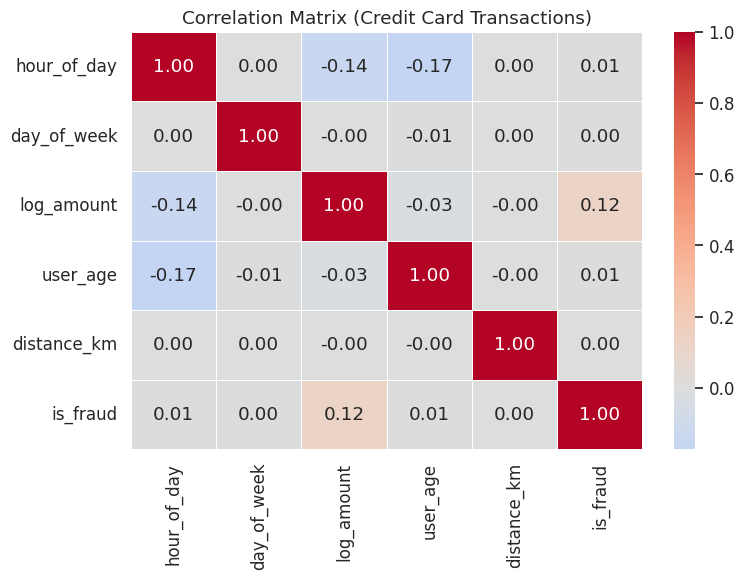

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1️⃣ 读取清理后的数据 ===
df = pd.read_csv("../data/creditCardTransaction/train/train.csv")

# 若 timestamp 是字符串类型，则不纳入相关性计算
numeric_cols = [
    "hour_of_day", "day_of_week", "log_amount",
    "user_age", "distance_km", "is_fraud"
]

# === 2️⃣ 计算相关系数矩阵 ===
corr = df[numeric_cols].corr(method="pearson")

# === 3️⃣ 绘制热力图 ===
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
)
plt.title("Correlation Matrix (Credit Card Transactions)")
plt.tight_layout()
plt.show()


# IEEE

In [56]:
"""
Clean and preprocess IEEE-CIS Fraud Detection dataset
-----------------------------------------------------
This script merges transaction + identity tables,
performs cleaning, encoding, PCA reduction and stratified split.
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

# =============== 1️⃣ Load and Merge =====================
transaction_path = "../rawdata/IEEE/train_transaction.csv"
identity_path = "../rawdata/IEEE/train_identity.csv"

print("Loading data...")
trans = pd.read_csv(transaction_path)
iden = pd.read_csv(identity_path)

df = pd.merge(trans, iden, on="TransactionID", how="left")
print(f"Merged shape: {df.shape}")

# =============== 2️⃣ Basic Cleaning =====================
print("Basic cleaning...")

# timestamp
df["timestamp"] = pd.to_datetime(df["TransactionDT"], unit="s", origin="2017-12-01")
df["hour_of_day"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

# log amount
df["log_amount"] = np.log1p(df["TransactionAmt"].clip(lower=0))

# approximate user_id
df["user_id"] = (
    df["card1"].astype(str) + "_" +
    df["card2"].astype(str) + "_" +
    df["card3"].astype(str)
)

# numeric fill
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# categorical fill
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna("unknown")

# =============== 3️⃣ Feature Engineering =====================
print("Feature engineering...")

# periodic time encoding
df["sin_hour"] = np.sin(2 * np.pi * df["hour_of_day"] / 24)
df["cos_hour"] = np.cos(2 * np.pi * df["hour_of_day"] / 24)

# user-level transaction stats
df["user_txn_count"] = df.groupby("user_id")["TransactionID"].transform("count")
df["user_txn_mean"] = df.groupby("user_id")["TransactionAmt"].transform("mean")
df["user_txn_std"] = df.groupby("user_id")["TransactionAmt"].transform("std").fillna(0)

# compress device/system strings
for col in ["DeviceInfo", "id_30", "id_31"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.lower()
            .str.extract("([a-z0-9]+)")
            .fillna("unknown")
        )

# =============== 4️⃣ Encode Categorical =====================
print("Encoding categorical features...")

cat_features = [
    "ProductCD", "card4", "card6", "P_emaildomain",
    "DeviceType", "DeviceInfo", "id_30", "id_31", "addr1", "addr2"
]
for col in cat_features:
    if col in df.columns:
        freqs = df[col].value_counts(normalize=True)
        df[col + "_freq"] = df[col].map(freqs)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# =============== 5️⃣ PCA on V features =====================
print("Reducing V-features with PCA...")

v_cols = [f"V{i}" for i in range(1, 340) if f"V{i}" in df.columns]
if v_cols:
    v_data = df[v_cols].fillna(0)
    pca = PCA(n_components=50, random_state=42)
    v_reduced = pca.fit_transform(v_data)
    v_df = pd.DataFrame(v_reduced, columns=[f"V_pca_{i}" for i in range(50)])
    df = pd.concat([df.drop(columns=v_cols), v_df], axis=1)
    print(f"V-features reduced from {len(v_cols)} → 50")

# =============== 6️⃣ Scaling numeric =====================
print("Scaling numeric features...")

num_cols = df.select_dtypes(include=[np.number]).columns.drop("isFraud", errors="ignore")
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# =============== 7️⃣ Select & Save Schema =====================
print("Selecting final columns...")

keep_cols = [
    "timestamp", "hour_of_day", "day_of_week", "log_amount",
    "sin_hour", "cos_hour", "user_txn_count", "user_txn_mean", "user_txn_std",
    "user_id", "isFraud"
]

# add encoded/freq/pca columns
extra_cols = [
    c for c in df.columns
    if c not in keep_cols and (c.startswith("V_pca_") or c.endswith("_freq") or c in cat_features)
]
final_cols = keep_cols + extra_cols

df_final = df[final_cols].copy()
print(f"Final dataset shape: {df_final.shape}")

# =============== 8️⃣ Stratified Split =====================
print("Splitting train/test (80/20)...")

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df_final, df_final["isFraud"]):
    train = df_final.iloc[train_idx]
    test = df_final.iloc[test_idx]

# =============== 9️⃣ Save =====================
print("Saving files...")

save_dir = "../data/IEEE/"
train.to_csv(save_dir + "train.csv", index=False)
test.to_csv(save_dir + "test.csv", index=False)

print("✅ Done! Cleaned and reduced data saved to ../data/IEEE/")


Loading data...
Merged shape: (590540, 434)
Basic cleaning...
Feature engineering...


/tmp/ipykernel_2072075/1439110950.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["sin_hour"] = np.sin(2 * np.pi * df["hour_of_day"] / 24)
/tmp/ipykernel_2072075/1439110950.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["cos_hour"] = np.cos(2 * np.pi * df["hour_of_day"] / 24)
/tmp/ipykernel_2072075/1439110950.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

Encoding categorical features...


/tmp/ipykernel_2072075/1439110950.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_freq"] = df[col].map(freqs)
/tmp/ipykernel_2072075/1439110950.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_freq"] = df[col].map(freqs)
/tmp/ipykernel_2072075/1439110950.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Reducing V-features with PCA...
V-features reduced from 339 → 50
Scaling numeric features...
Selecting final columns...
Final dataset shape: (590540, 81)
Splitting train/test (80/20)...
Saving files...
✅ Done! Cleaned and reduced data saved to ../data/IEEE/


# loyalty vs fraud